In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#  Linear Regression Assumptions

- Assumptions are the parameters that decide whether a model is best or not
- In Linear Regression there are six such Assumptions 
- The Assumtions are :
    1) Linearity
    2) No or little Multicollinearity
    3) Mean of Residuals
    4) Homoscedasticity
    5) Normality of Residuals
    6) Auto Correlation

In [3]:
#importing dataset
df = pd.read_csv(r"E:\HSNC\SEM 2\ML\Advertising - Advertising.csv")

In [4]:
#Data Cleaning
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#Removing Unnnecessary Variable
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


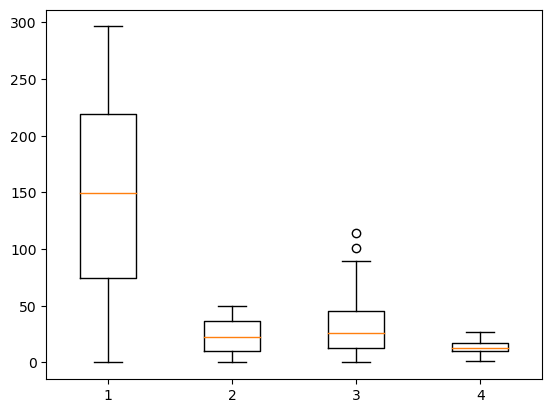

In [9]:
plt.boxplot(df)
plt.show()

In [10]:
a = df[df["Newspaper"]>90]

In [11]:
a

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


# 1. Linearity

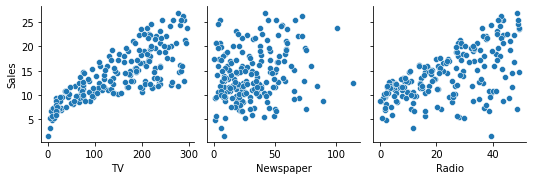

In [21]:
sns.pairplot(df,x_vars=['TV',"Newspaper","Radio"],y_vars=['Sales'])
plt.show()

There is linear relation between Radio and TV with Sales
Newspaper is Scatterd

# 2. No or Little Multicollinearity
 
- Multicollinearity means the correlation between independent or exploratory variables.
- This should be very less or should not exist.

<AxesSubplot:>

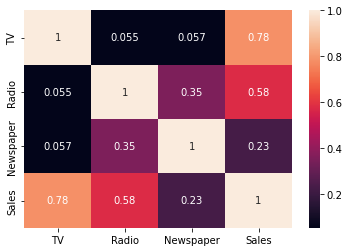

In [22]:
sns.heatmap(df.corr(),annot=True)

No multicollinearity as no independent variable has much correlation between them

# 3. Mean of Residuals

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
x = df[['Newspaper','TV','Radio']]
y = df[['Sales']]


In [25]:
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [26]:
y_pred = LR.predict(x)

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y, y_pred)

0.8972106381789521

In [29]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y,y_pred)
MSE

2.7841263145109365

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_pred)

1.2520112296870685

In [31]:
#Adding columns for y-predict and Residuals

df1 = df.copy()

df1['Y-predict'] = y_pred
df1['Residuals'] = y-y_pred

df1

,TV,Radio,Newspaper,Sales,Y-predict,Residuals
0,230.1,37.8,69.2,22.1,20.523974,1.576026
1,44.5,39.3,45.1,10.4,12.337855,-1.937855
2,17.2,45.9,69.3,9.3,12.307671,-3.007671
3,151.5,41.3,58.5,18.5,17.597830,0.902170
4,180.8,10.8,58.4,12.9,13.188672,-0.288672
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.370342,2.229658
196,94.2,4.9,8.1,9.7,8.165312,1.534688
197,177.0,9.3,6.4,12.8,12.785921,0.014079
198,283.6,42.0,66.2,25.5,23.767321,1.732679


In [32]:
Mean_of_residuals = np.mean(df1['Residuals'])
Mean_of_residuals

-1.5987211554602254e-16

From above we can conclude that mean of residuals is 0

# 4. Homoscedasticity

- Variance of error must be constant.
- Spread of residual values must be consistent.

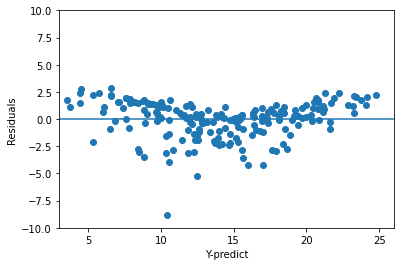

In [33]:
plt.scatter(x=df1['Y-predict'],y=df1['Residuals'])
plt.xlabel('Y-predict')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(3,26)
plt.axhline(0)
plt.show()

In [34]:
#Using Log method
x1 = df[['Newspaper','TV','Radio']]
y1 = np.log(y)

In [35]:
LR = LinearRegression()
LR.fit(x1,y1)

LinearRegression()

In [36]:
y_pred = LR.predict(x1)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_true=y1, y_pred=y_pred)

0.7997643719451603

In [46]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y1,y_pred)
MSE

0.0342058669129037

In [48]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y1,y_pred)

0.11444405706649557

In [40]:
#Adding columns for y-predict and Residuals

df2 = df.copy()

df2['Y-predict'] = y_pred
df2['Residuals'] = y1-y_pred

df2

,TV,Radio,Newspaper,Sales,Y-predict,Residuals
0,230.1,37.8,69.2,22.1,3.054034,0.041543
1,44.5,39.3,45.1,10.4,2.382101,-0.040295
2,17.2,45.9,69.3,9.3,2.368386,-0.138372
3,151.5,41.3,58.5,18.5,2.803111,0.114660
4,180.8,10.8,58.4,12.9,2.550639,0.006588
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,1.927742,0.100406
196,94.2,4.9,8.1,9.7,2.145387,0.126739
197,177.0,9.3,6.4,12.8,2.500564,0.048881
198,283.6,42.0,66.2,25.5,3.298868,-0.060190


In [49]:
df2.describe()

,TV,Radio,Newspaper,Sales,Y-predict,Residuals
count,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,147.042500,23.264000,30.554000,14.022500,2.563991,4.207745e-16
std,85.854236,14.846809,21.778621,5.217457,0.370552,1.854124e-01
min,0.700000,0.000000,0.300000,1.600000,1.795700,-1.742006e+00
25%,74.375000,9.975000,12.750000,10.375000,2.263893,-5.892167e-02
50%,149.750000,22.900000,25.750000,12.900000,2.590361,4.715202e-02
75%,218.825000,36.525000,45.100000,17.400000,2.845385,1.055292e-01
max,296.400000,49.600000,114.000000,27.000000,3.347068,2.066566e-01


In [52]:
Mean_of_residuals = np.mean(df2['Residuals'])
Mean_of_residuals

4.2077452633293433e-16

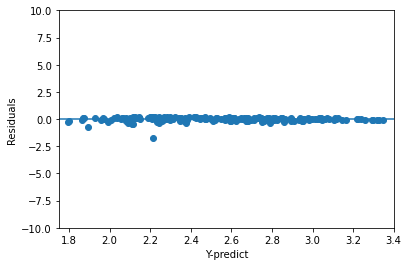

In [55]:
plt.scatter(x=df2['Y-predict'],y=df2['Residuals'])
plt.xlabel('Y-predict')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(1.75,3.4)
plt.axhline(0)
plt.show()

- As we can see the spread of errors is consistent around a level

# 5. Normality of Residuals

- The residuals must be normally distributed
- There are two ways to check this :

    1) Using Histogram
    2) Using Q.Q Plot

# 5.1 Using Histogram

(-6.0, 5.0)

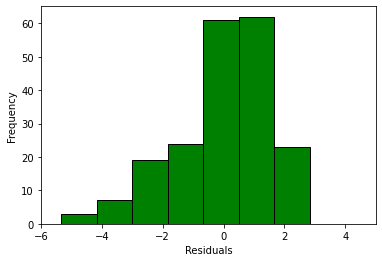

In [59]:
plt.hist(df1['Residuals'],edgecolor='Black',color='Green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xlim(-6,5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


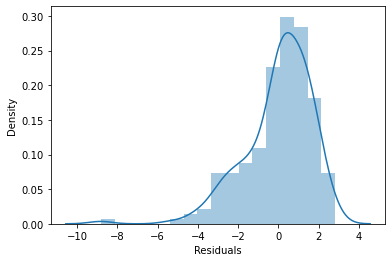

In [61]:
sns.distplot(df1['Residuals'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


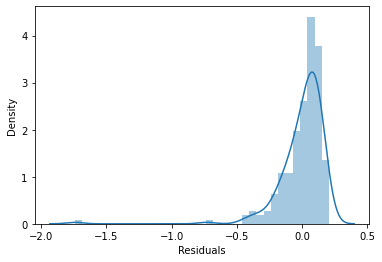

In [62]:
sns.distplot(df2['Residuals'])
plt.show()

The histogram and density distribution depicts a close to normal distribution of the residuals. For, logy the density distribution gives a more precised normally distributed plot for the residuals showing normality in the residuals

# 5.2 Using Q.Q Plot

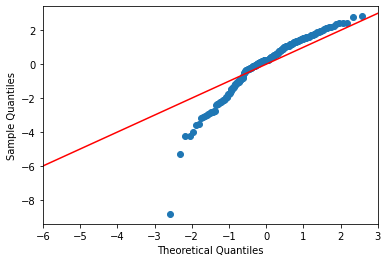

In [64]:
sm.qqplot(df1['Residuals'],line='45')
plt.xlim(-6,3)
plt.show()

# 6. Autocorrelation 

- Autocorrelation means Residuals are dependent on each other

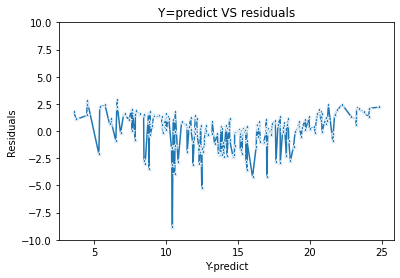

In [67]:
sns.lineplot(x=df1['Y-predict'],y=df1['Residuals'],marker='*').set(title='Y=predict VS residuals')
plt.ylim(-10,10)
plt.show()

# 6.1 Dependent variable taken as logy

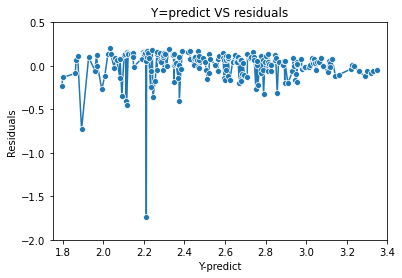

In [69]:
sns.lineplot(x=df2['Y-predict'],y=df2['Residuals'],marker='o').set(title='Y=predict VS residuals')
plt.ylim(-2,0.5)
plt.xlim(1.75,3.4)
plt.show()

- Since, there is no enough evidence of pattern between the residuals in the plot of y-predict VS residuals. 
- This implies no autocorrelation between the residuals.